In [15]:
from train_shap import get_model_data_for_shap, ModelReversingY, get_data_for_Shap
import shap
import joblib
# beA3o82D_1112_1_all
fmodel, params, pp, fp= get_model_data_for_shap('trainshap_timeseries.yaml', 'beA3o82D', 1112)
joblib.dump(fmodel, 'fmodel.pkl')
model = ModelReversingY(fmodel, params)


2024-10-04 22:26:46.944 | INFO     | preprocessor:_dropna:156 - Dropping NaN values
2024-10-04 22:26:47.124 | INFO     | preprocessor:_dropna:180 - Columns with NaN values: Index(['Hematocrit_Avg_preclinical', 'Hematocrit_Avg_acute',
       'Hematocrit_Avg_chronic', 'LymphocytesPercentage_Avg_preclinical',
       'LymphocytesPercentage_Avg_acute', 'LymphocytesPercentage_Avg_chronic',
       'NeutrophilsPercentage_Avg_preclinical',
       'NeutrophilsPercentage_Avg_acute', 'NeutrophilsPercentage_Avg_chronic',
       'MonocytesPercentage_Avg_preclinical',
       ...
       'Crab_Avg_chronic', 'MixedGrasses_Avg_preclinical',
       'MixedGrasses_Avg_acute', 'MixedGrasses_Avg_chronic',
       'Mugwort_Avg_preclinical', 'Mugwort_Avg_acute', 'Mugwort_Avg_chronic',
       'Salmon_Avg_preclinical', 'Salmon_Avg_acute', 'Salmon_Avg_chronic'],
      dtype='object', length=233)
2024-10-04 22:26:47.128 | INFO     | preprocessor:_imputation:192 - Imputing missing values
2024-10-04 22:26:47.753 | INF

[0]	train-rmsle:1.31738	train-roc_auc:0.66434	validation-rmsle:1.28889	validation-roc_auc:0.63822
[1]	train-rmsle:1.27586	train-roc_auc:0.70020	validation-rmsle:1.24826	validation-roc_auc:0.67522
[2]	train-rmsle:1.23589	train-roc_auc:0.70036	validation-rmsle:1.20941	validation-roc_auc:0.67442
[3]	train-rmsle:1.19749	train-roc_auc:0.70036	validation-rmsle:1.17217	validation-roc_auc:0.67442
[4]	train-rmsle:1.16075	train-roc_auc:0.72175	validation-rmsle:1.13634	validation-roc_auc:0.70284
[5]	train-rmsle:1.12563	train-roc_auc:0.72175	validation-rmsle:1.10219	validation-roc_auc:0.70284
[6]	train-rmsle:1.09220	train-roc_auc:0.73980	validation-rmsle:1.06952	validation-roc_auc:0.72475
[7]	train-rmsle:1.06043	train-roc_auc:0.73979	validation-rmsle:1.03879	validation-roc_auc:0.72431
[8]	train-rmsle:1.03034	train-roc_auc:0.73732	validation-rmsle:1.00978	validation-roc_auc:0.72311
[9]	train-rmsle:1.00192	train-roc_auc:0.73979	validation-rmsle:0.98278	validation-roc_auc:0.72431
[10]	train-rmsle:0.9

In [34]:
pp.feature_filter.features_list

['EosinophilsPercentage',
 'MonocytesPercentage',
 'Hemoglobin',
 'NeutrophilsPercentage',
 'AbsoluteLymphocyteCount',
 'AbsoluteEosinophilCount',
 'CReactiveProtein',
 'AntiJo1',
 'Nucleosome',
 'BasophilsPercentage',
 'RibosomalPProtein',
 'PlateletCount',
 'EosinophilCountAbsolute',
 'LymphocytesPercentage',
 'MeanPlateletVolume',
 'MeanCorpuscularVolume',
 'MeanCorpuscularHemoglobinConcentration',
 'PlateletDistributionWidth',
 'MeanCorpuscularHemoglobin',
 'FreeThyroxine',
 'SMRNP',
 'ImmunoglobulinE',
 'Ro52',
 'WhiteBloodCellCount',
 'AntiSSA']

In [22]:
def get_shap_values(key):
    X = get_data_for_Shap(fmodel, fp, params.copy(), 
                        0.5,
                        pp, k = 2.5, randomrate= 0.1,
                        pick_key= key)


    if X.shape[0] > 100:
        X100 = shap.utils.sample(X, 100) 
    else:
        X100 = X
    explainer = shap.Explainer(model.predict, X100)
    shap_values = explainer(X100)
    return shap_values, X100

In [17]:
import matplotlib.pyplot as plt
from preprocessor import get_asso_feat
import os   
if not os.path.exists('shap'):
    os.makedirs('shap')
for ageggroup in ['0-2', '2-6', '6-12', '12-25', '25-55', '55+', 'all']:
    print(ageggroup)
    shap_values, X = get_shap_values(ageggroup)
    for index, featgroup in enumerate(pp.feature_filter.features_list):
        print(featgroup)
        featlist = get_asso_feat(featgroup, X.columns)
        shap.plots.beeswarm(shap_values[:,featlist],show=False)
        fig = plt.gcf()  # plt.gcf() 用于获取当前的图像对象
        fig.suptitle(f"{featgroup} in {ageggroup} age group")
        fig.savefig(f"shap/{featgroup}_{ageggroup}.png",bbox_inches = 'tight')
        plt.clf()
        



0-2


2024-10-04 22:27:07.172 | INFO     | preprocessor:_dropna:156 - Dropping NaN values
2024-10-04 22:27:07.306 | INFO     | preprocessor:_dropna:180 - Columns with NaN values: Index(['Hematocrit_Avg_preclinical', 'Hematocrit_Avg_acute',
       'Hematocrit_Avg_chronic', 'LymphocytesPercentage_Avg_preclinical',
       'LymphocytesPercentage_Avg_acute', 'LymphocytesPercentage_Avg_chronic',
       'NeutrophilsPercentage_Avg_preclinical',
       'NeutrophilsPercentage_Avg_acute', 'NeutrophilsPercentage_Avg_chronic',
       'MonocytesPercentage_Avg_preclinical',
       ...
       'Crab_Avg_chronic', 'MixedGrasses_Avg_preclinical',
       'MixedGrasses_Avg_acute', 'MixedGrasses_Avg_chronic',
       'Mugwort_Avg_preclinical', 'Mugwort_Avg_acute', 'Mugwort_Avg_chronic',
       'Salmon_Avg_preclinical', 'Salmon_Avg_acute', 'Salmon_Avg_chronic'],
      dtype='object', length=233)
2024-10-04 22:27:07.308 | INFO     | preprocessor:_imputation:192 - Imputing missing values
2024-10-04 22:27:07.866 | INF

EosinophilsPercentage
MonocytesPercentage
Hemoglobin
NeutrophilsPercentage
AbsoluteLymphocyteCount
AbsoluteEosinophilCount
CReactiveProtein
AntiJo1
Nucleosome
BasophilsPercentage
RibosomalPProtein
PlateletCount
EosinophilCountAbsolute
LymphocytesPercentage
MeanPlateletVolume
MeanCorpuscularVolume
MeanCorpuscularHemoglobinConcentration
PlateletDistributionWidth
MeanCorpuscularHemoglobin
FreeThyroxine
SMRNP
ImmunoglobulinE
Ro52
WhiteBloodCellCount
AntiSSA
2-6


2024-10-04 22:27:16.672 | INFO     | preprocessor:_dropna:156 - Dropping NaN values
2024-10-04 22:27:16.833 | INFO     | preprocessor:_dropna:180 - Columns with NaN values: Index(['Hematocrit_Avg_preclinical', 'Hematocrit_Avg_acute',
       'Hematocrit_Avg_chronic', 'LymphocytesPercentage_Avg_preclinical',
       'LymphocytesPercentage_Avg_acute', 'LymphocytesPercentage_Avg_chronic',
       'NeutrophilsPercentage_Avg_preclinical',
       'NeutrophilsPercentage_Avg_acute', 'NeutrophilsPercentage_Avg_chronic',
       'MonocytesPercentage_Avg_preclinical',
       ...
       'Crab_Avg_chronic', 'MixedGrasses_Avg_preclinical',
       'MixedGrasses_Avg_acute', 'MixedGrasses_Avg_chronic',
       'Mugwort_Avg_preclinical', 'Mugwort_Avg_acute', 'Mugwort_Avg_chronic',
       'Salmon_Avg_preclinical', 'Salmon_Avg_acute', 'Salmon_Avg_chronic'],
      dtype='object', length=233)
2024-10-04 22:27:16.835 | INFO     | preprocessor:_imputation:192 - Imputing missing values
2024-10-04 22:27:17.416 | INF

EosinophilsPercentage
MonocytesPercentage
Hemoglobin
NeutrophilsPercentage
AbsoluteLymphocyteCount
AbsoluteEosinophilCount
CReactiveProtein
AntiJo1
Nucleosome
BasophilsPercentage
RibosomalPProtein
PlateletCount
EosinophilCountAbsolute
LymphocytesPercentage
MeanPlateletVolume
MeanCorpuscularVolume
MeanCorpuscularHemoglobinConcentration
PlateletDistributionWidth
MeanCorpuscularHemoglobin
FreeThyroxine
SMRNP
ImmunoglobulinE
Ro52
WhiteBloodCellCount
AntiSSA
6-12


2024-10-04 22:27:44.530 | INFO     | preprocessor:_dropna:156 - Dropping NaN values
2024-10-04 22:27:44.672 | INFO     | preprocessor:_dropna:180 - Columns with NaN values: Index(['Hematocrit_Avg_preclinical', 'Hematocrit_Avg_acute',
       'Hematocrit_Avg_chronic', 'LymphocytesPercentage_Avg_preclinical',
       'LymphocytesPercentage_Avg_acute', 'LymphocytesPercentage_Avg_chronic',
       'NeutrophilsPercentage_Avg_preclinical',
       'NeutrophilsPercentage_Avg_acute', 'NeutrophilsPercentage_Avg_chronic',
       'MonocytesPercentage_Avg_preclinical',
       ...
       'Crab_Avg_chronic', 'MixedGrasses_Avg_preclinical',
       'MixedGrasses_Avg_acute', 'MixedGrasses_Avg_chronic',
       'Mugwort_Avg_preclinical', 'Mugwort_Avg_acute', 'Mugwort_Avg_chronic',
       'Salmon_Avg_preclinical', 'Salmon_Avg_acute', 'Salmon_Avg_chronic'],
      dtype='object', length=233)
2024-10-04 22:27:44.674 | INFO     | preprocessor:_imputation:192 - Imputing missing values
2024-10-04 22:27:45.231 | INF

EosinophilsPercentage
MonocytesPercentage
Hemoglobin
NeutrophilsPercentage
AbsoluteLymphocyteCount
AbsoluteEosinophilCount
CReactiveProtein
AntiJo1
Nucleosome
BasophilsPercentage
RibosomalPProtein
PlateletCount
EosinophilCountAbsolute
LymphocytesPercentage
MeanPlateletVolume
MeanCorpuscularVolume
MeanCorpuscularHemoglobinConcentration
PlateletDistributionWidth
MeanCorpuscularHemoglobin
FreeThyroxine
SMRNP
ImmunoglobulinE
Ro52
WhiteBloodCellCount
AntiSSA
12-25


2024-10-04 22:28:02.344 | INFO     | preprocessor:_dropna:156 - Dropping NaN values
2024-10-04 22:28:02.487 | INFO     | preprocessor:_dropna:180 - Columns with NaN values: Index(['Hematocrit_Avg_preclinical', 'Hematocrit_Avg_acute',
       'Hematocrit_Avg_chronic', 'LymphocytesPercentage_Avg_preclinical',
       'LymphocytesPercentage_Avg_acute', 'LymphocytesPercentage_Avg_chronic',
       'NeutrophilsPercentage_Avg_preclinical',
       'NeutrophilsPercentage_Avg_acute', 'NeutrophilsPercentage_Avg_chronic',
       'MonocytesPercentage_Avg_preclinical',
       ...
       'Crab_Avg_chronic', 'MixedGrasses_Avg_preclinical',
       'MixedGrasses_Avg_acute', 'MixedGrasses_Avg_chronic',
       'Mugwort_Avg_preclinical', 'Mugwort_Avg_acute', 'Mugwort_Avg_chronic',
       'Salmon_Avg_preclinical', 'Salmon_Avg_acute', 'Salmon_Avg_chronic'],
      dtype='object', length=233)
2024-10-04 22:28:02.489 | INFO     | preprocessor:_imputation:192 - Imputing missing values
2024-10-04 22:28:03.040 | INF

EosinophilsPercentage
MonocytesPercentage
Hemoglobin
NeutrophilsPercentage
AbsoluteLymphocyteCount
AbsoluteEosinophilCount
CReactiveProtein
AntiJo1
Nucleosome
BasophilsPercentage
RibosomalPProtein
PlateletCount
EosinophilCountAbsolute
LymphocytesPercentage
MeanPlateletVolume
MeanCorpuscularVolume
MeanCorpuscularHemoglobinConcentration
PlateletDistributionWidth
MeanCorpuscularHemoglobin
FreeThyroxine
SMRNP
ImmunoglobulinE
Ro52
WhiteBloodCellCount
AntiSSA
25-55


2024-10-04 22:28:09.922 | INFO     | preprocessor:_dropna:156 - Dropping NaN values
2024-10-04 22:28:10.056 | INFO     | preprocessor:_dropna:180 - Columns with NaN values: Index(['Hematocrit_Avg_preclinical', 'Hematocrit_Avg_acute',
       'Hematocrit_Avg_chronic', 'LymphocytesPercentage_Avg_preclinical',
       'LymphocytesPercentage_Avg_acute', 'LymphocytesPercentage_Avg_chronic',
       'NeutrophilsPercentage_Avg_preclinical',
       'NeutrophilsPercentage_Avg_acute', 'NeutrophilsPercentage_Avg_chronic',
       'MonocytesPercentage_Avg_preclinical',
       ...
       'Crab_Avg_chronic', 'MixedGrasses_Avg_preclinical',
       'MixedGrasses_Avg_acute', 'MixedGrasses_Avg_chronic',
       'Mugwort_Avg_preclinical', 'Mugwort_Avg_acute', 'Mugwort_Avg_chronic',
       'Salmon_Avg_preclinical', 'Salmon_Avg_acute', 'Salmon_Avg_chronic'],
      dtype='object', length=233)
2024-10-04 22:28:10.057 | INFO     | preprocessor:_imputation:192 - Imputing missing values
2024-10-04 22:28:10.612 | INF

EosinophilsPercentage
MonocytesPercentage
Hemoglobin
NeutrophilsPercentage
AbsoluteLymphocyteCount
AbsoluteEosinophilCount
CReactiveProtein
AntiJo1
Nucleosome
BasophilsPercentage
RibosomalPProtein
PlateletCount
EosinophilCountAbsolute
LymphocytesPercentage
MeanPlateletVolume
MeanCorpuscularVolume
MeanCorpuscularHemoglobinConcentration
PlateletDistributionWidth
MeanCorpuscularHemoglobin
FreeThyroxine
SMRNP
ImmunoglobulinE
Ro52
WhiteBloodCellCount
AntiSSA
55+


2024-10-04 22:28:24.885 | INFO     | preprocessor:_dropna:156 - Dropping NaN values
2024-10-04 22:28:25.025 | INFO     | preprocessor:_dropna:180 - Columns with NaN values: Index(['Hematocrit_Avg_preclinical', 'Hematocrit_Avg_acute',
       'Hematocrit_Avg_chronic', 'LymphocytesPercentage_Avg_preclinical',
       'LymphocytesPercentage_Avg_acute', 'LymphocytesPercentage_Avg_chronic',
       'NeutrophilsPercentage_Avg_preclinical',
       'NeutrophilsPercentage_Avg_acute', 'NeutrophilsPercentage_Avg_chronic',
       'MonocytesPercentage_Avg_preclinical',
       ...
       'Crab_Avg_chronic', 'MixedGrasses_Avg_preclinical',
       'MixedGrasses_Avg_acute', 'MixedGrasses_Avg_chronic',
       'Mugwort_Avg_preclinical', 'Mugwort_Avg_acute', 'Mugwort_Avg_chronic',
       'Salmon_Avg_preclinical', 'Salmon_Avg_acute', 'Salmon_Avg_chronic'],
      dtype='object', length=233)
2024-10-04 22:28:25.027 | INFO     | preprocessor:_imputation:192 - Imputing missing values
2024-10-04 22:28:25.579 | INF

EosinophilsPercentage
MonocytesPercentage
Hemoglobin
NeutrophilsPercentage
AbsoluteLymphocyteCount
AbsoluteEosinophilCount
CReactiveProtein
AntiJo1
Nucleosome
BasophilsPercentage
RibosomalPProtein
PlateletCount
EosinophilCountAbsolute
LymphocytesPercentage
MeanPlateletVolume
MeanCorpuscularVolume
MeanCorpuscularHemoglobinConcentration
PlateletDistributionWidth
MeanCorpuscularHemoglobin
FreeThyroxine
SMRNP
ImmunoglobulinE
Ro52
WhiteBloodCellCount
AntiSSA
all


2024-10-04 22:28:33.778 | INFO     | preprocessor:_dropna:156 - Dropping NaN values
2024-10-04 22:28:33.918 | INFO     | preprocessor:_dropna:180 - Columns with NaN values: Index(['Hematocrit_Avg_preclinical', 'Hematocrit_Avg_acute',
       'Hematocrit_Avg_chronic', 'LymphocytesPercentage_Avg_preclinical',
       'LymphocytesPercentage_Avg_acute', 'LymphocytesPercentage_Avg_chronic',
       'NeutrophilsPercentage_Avg_preclinical',
       'NeutrophilsPercentage_Avg_acute', 'NeutrophilsPercentage_Avg_chronic',
       'MonocytesPercentage_Avg_preclinical',
       ...
       'Crab_Avg_chronic', 'MixedGrasses_Avg_preclinical',
       'MixedGrasses_Avg_acute', 'MixedGrasses_Avg_chronic',
       'Mugwort_Avg_preclinical', 'Mugwort_Avg_acute', 'Mugwort_Avg_chronic',
       'Salmon_Avg_preclinical', 'Salmon_Avg_acute', 'Salmon_Avg_chronic'],
      dtype='object', length=233)
2024-10-04 22:28:33.920 | INFO     | preprocessor:_imputation:192 - Imputing missing values
2024-10-04 22:28:34.479 | INF

EosinophilsPercentage
MonocytesPercentage
Hemoglobin
NeutrophilsPercentage
AbsoluteLymphocyteCount
AbsoluteEosinophilCount
CReactiveProtein
AntiJo1
Nucleosome
BasophilsPercentage
RibosomalPProtein
PlateletCount
EosinophilCountAbsolute
LymphocytesPercentage
MeanPlateletVolume
MeanCorpuscularVolume
MeanCorpuscularHemoglobinConcentration
PlateletDistributionWidth
MeanCorpuscularHemoglobin
FreeThyroxine
SMRNP
ImmunoglobulinE
Ro52
WhiteBloodCellCount
AntiSSA


<Figure size 800x230 with 0 Axes>

In [26]:
shap_values, X100 = get_shap_values('all')

2024-10-04 22:53:45.097 | INFO     | preprocessor:_dropna:156 - Dropping NaN values
2024-10-04 22:53:45.250 | INFO     | preprocessor:_dropna:180 - Columns with NaN values: Index(['Hematocrit_Avg_preclinical', 'Hematocrit_Avg_acute',
       'Hematocrit_Avg_chronic', 'LymphocytesPercentage_Avg_preclinical',
       'LymphocytesPercentage_Avg_acute', 'LymphocytesPercentage_Avg_chronic',
       'NeutrophilsPercentage_Avg_preclinical',
       'NeutrophilsPercentage_Avg_acute', 'NeutrophilsPercentage_Avg_chronic',
       'MonocytesPercentage_Avg_preclinical',
       ...
       'Crab_Avg_chronic', 'MixedGrasses_Avg_preclinical',
       'MixedGrasses_Avg_acute', 'MixedGrasses_Avg_chronic',
       'Mugwort_Avg_preclinical', 'Mugwort_Avg_acute', 'Mugwort_Avg_chronic',
       'Salmon_Avg_preclinical', 'Salmon_Avg_acute', 'Salmon_Avg_chronic'],
      dtype='object', length=233)
2024-10-04 22:53:45.252 | INFO     | preprocessor:_imputation:192 - Imputing missing values
2024-10-04 22:53:45.822 | INF

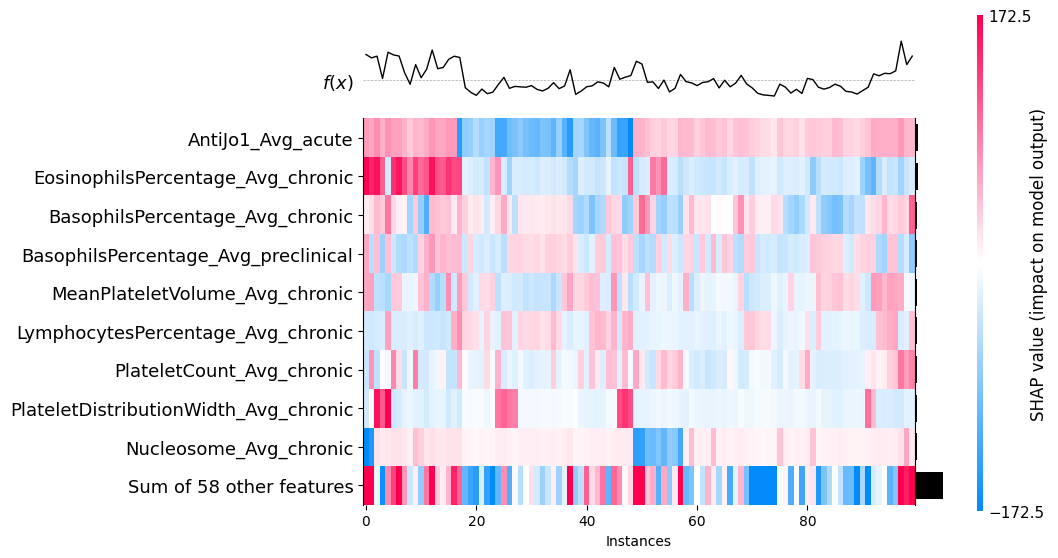

<Axes: xlabel='Instances'>

In [29]:
shap.plots.heatmap(shap_values[:1000])

In [32]:
import shap
shap.initjs()  # 初始化 JavaScript 库


In [33]:
shap.plots.force(shap_values)